In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import anndata
import celltypist
from celltypist import models

In [2]:
plt.rcParams["font.family"] = "monospace"
plt.rcParams["font.size"] = 8

In [3]:
adata = anndata.read_h5ad("C:/Users/saman/00_Bachelorarbeit/Bachelor/data/output/adata_norms.h5ad")
adata

AnnData object with n_obs × n_vars = 7641 × 10962
    obs: 'sampleID', 'barcode', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', '_scvi_batch', '_scvi_labels'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'neighbors', 'sampleID_colors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    layers: 'int_norm', 'int_norm_log', 'tc_norm', 'tc_norm_log'
    obsp: 'connectivities', 'distances'

In [4]:
marker_genes = {
    "T Cell": 
    [
        "SELL", "CCR7",
        "ITGAE", "ITGA1", "SPRY1", "IL17A", "CCR6", "CCL20",
        "CXCR5", "BCL6", "PDCD1", "CD40LG",
        "FOXP3", "CTLA4", "IL2RA", "IL10",
        "GZMK", "CRTAM", "EOMES", 
        "SELL", "KLRC2", "TRDC", "TRGC1", "KIR2DL4", "CCR7"
        "KLRC2", "TRDC", "TRGC1", "KIR2DL4", 
        "SLC4A10", "TRAV1-2",
        "FCGR3A", "GNLY", "GZMB", "NKG7",
        "XCL1", "IL2RB", "NCR1", "FCER1G", "NCAM1"
    ], 

    "Dentritic Cell": 
    [
        "CLEC9A", "XCR1", "BATF3", "CADM1", "RAB7B",
        "CLEC10A", "FCER1A", "CD1C",
        "CCR7", "LAMP3",
        "IRF7", "CLEC4C", "JCHAIN", "LILRA4", "GZMB",
        "ITGAX", "IL22RA2", "CD207", "RUNX3"
    ], 
    "Macrophage": 
    [
        "LYVE1", "RNASE1", "FOLR2",
        "MMP9", "PLA2G2D", "ADAMDEC1",
        "TREM2", "ACP5", "CTSD", "CSTB",
        "CD5L", "VCAM1", "CXCL12", "PDK4", "RBP7",
        "CD209"
    ],
    "Monocyte": 
    [
        "IL1B", "EREG", "NAMPT", "PLAUR", "VCAN", "FPR1", "CD3D00E", "MPO", "RETN", "RNASE2", "PCLAF"
    ],

    "Plasma B Cell": 
    [
        "XBP1",
        "IGHM",
        "IGHA1",
        "IGHA2",
        "IGHG3", "IGHG1", "IGHG2", "IGHG4"
    ],
    "B Cell": 
    [
        "SPIB", "TCL1A", "CD3D7",
        "IGLL1", "RAG1", "DNTT", "VPREB3",
        "SELL", "TCL1A", "IGHD",
        "CD27", "TNFSF13B",
        "MKI67", "AICDA",
        "BCL6", "SUGCT"
    ], 

    "Endothelial Cell": 
    [
        "RGCC", "COL4A1", "COL4A2", "IL32", "MCAM", "MYO1B",
        "GJA4", "HEY1", "CXCL12", "SEMA3G", "IGFBP3", "FBLN2", "FBLN5", "ELN",
        "BTNL9", "ALPL",
        "ACKR1", "CCL14", "SELE", "TNFRSF6B",
        "CCL21", "TFF3", "PROX1", "NTS",
        "MKI67", "TOP2A"
    ], 

    "Pericyte": 
    [
        "RERGL", "MUSTN1", "LBH", "NET1", "MAP3K20",
        "COX4I2", "HIGD1B", "RGS5", "NDUFA4L2",
        "GPC3", "COL14A1", "ECRG4", "ID4", "FHL2", "CXCL12"
    ],
    "Fibroblast": 
    [
        "ACTG2", "HHIP", "SOSTDC1", "NPNT",
        "CCL21", "CCL19", "TNFSF13B", "TDO2",
        "CTHRC1", "COL12A1", "COL1A1", "CTSK", "COL5A2",
        "APOD", "PLPP1", "MFAP4", "IFITM1", "RASD1",
        "PI16", "RSPO3", "SFRP1", "TM2A",
        "F3", "PLAT", "HSD17B2", "SOX6",
        "ADAMDEC1", "ADAM28", "CCL11", "CCL8", "CCL13", "CFD",
        "KCNN3", "THBS4", "FNDC1", "PPFIBP1"
    ], 
    
    "Epithelial Cells": ["PCNA", "DUT", "MCM3", "HELLS", "SLBP", "CCNB1", "CENPF", "CDC20", "CKS2", "MKI67", "TK1", "KRT15", 
                         "CXCL14", "COL17A1", "PCLAF", "MUC2", "TFF3", "FCGBP", "ZG16", "TOP2A", "MUC17", "TFF1"],
    "Gland Cells": ["LPO", "RARRES1", "ALDH1A3", "CCL28", "TFF3", "MUC5B", "BPIFB2", "AQP5", "PRR4", "CD74", "MUC6", "BPIFB1"],
    "Enteroendocrine Cells": ["HOPX", "CRYBA2", "GCG", "MLN", "GLS", "GAST", "SCGB2A1", "CLTRN", "CES1", "PAX6",
                            "SST", "GHRL", "GC", "ACSL1", "S100A1", "CHGA", "PCSK1N", "SCT", "SCGN", "NEUROD1", "SOX4"],
    "Enterocyte Cells": ["FABP2", "ALDOB", "APOA1", "FABP1", "APOA4", "PRAP1", "PCK1", "RBP2", "SI", "BEST4", "CA7", "OTOP2", "CFTR"],
    "Tuft Cells": ["SH2D6", "LRMP", "MATK", "FYB1", "HPGDS", "POU2F3", "TRPM5"],
    "Goblet Cells": ["GAU1", "MUC2", "TFF3", "FCGBP", "ZG16", "OLFM4", "MKI67", "TOP2A"],
    "Colonocyte Cells": ["SLC26A3", "AQP8", "CEACAM7", "CA1", "GPT", "BEST4", "CA7", "OTOP2"],

}

endo = ["Epithelial Cells", "Gland Cells", "Enteroendocrine Cells", "Enterocyte Cells", "Tuft Cells", "Goblet Cells", "Colonocyte Cells"]

In [5]:
marker_genes_in_data = dict()
for ct, markers in marker_genes.items():
    markers_found = list()
    for marker in markers:
        if marker in adata.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

In [6]:
adata.layers["counts"] = adata.X
adata.X = adata.layers['tc_norm_log']

sc.pp.highly_variable_genes(adata)

sc.tl.pca(adata, use_highly_variable=True)

sc.pp.neighbors(adata, n_pcs=30, use_rep="X_scVI")
sc.tl.umap(adata)

#sc.tl.leiden(adata, key_added="leiden_res0_25", resolution=0.25)
#sc.tl.leiden(adata, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata, key_added="leiden_res0_6", resolution=0.6)
#sc.tl.leiden(adata, key_added="leiden_res1", resolution=1.0)

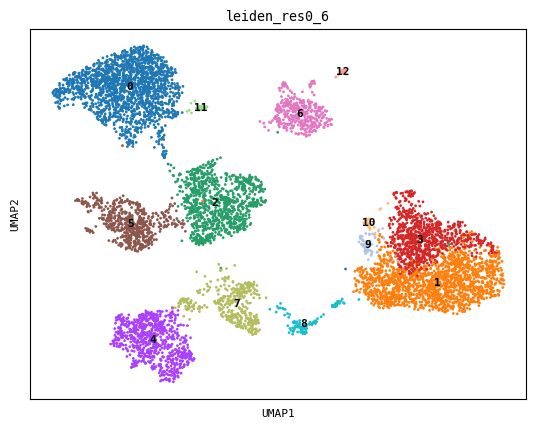

In [7]:
sc.pl.umap( # with total counts norm and log
    adata,
    color=["leiden_res0_6"],
    legend_loc="on data",
)

In [8]:
endo_markers = {
    ct: [m for m in ct_markers if m in adata.var.index]
    for ct, ct_markers in marker_genes_in_data.items()
    if ct in endo
}

other_markers = {
    ct: [m for m in ct_markers if m in adata.var.index]
    for ct, ct_markers in marker_genes_in_data.items()
    if ct not in endo
}

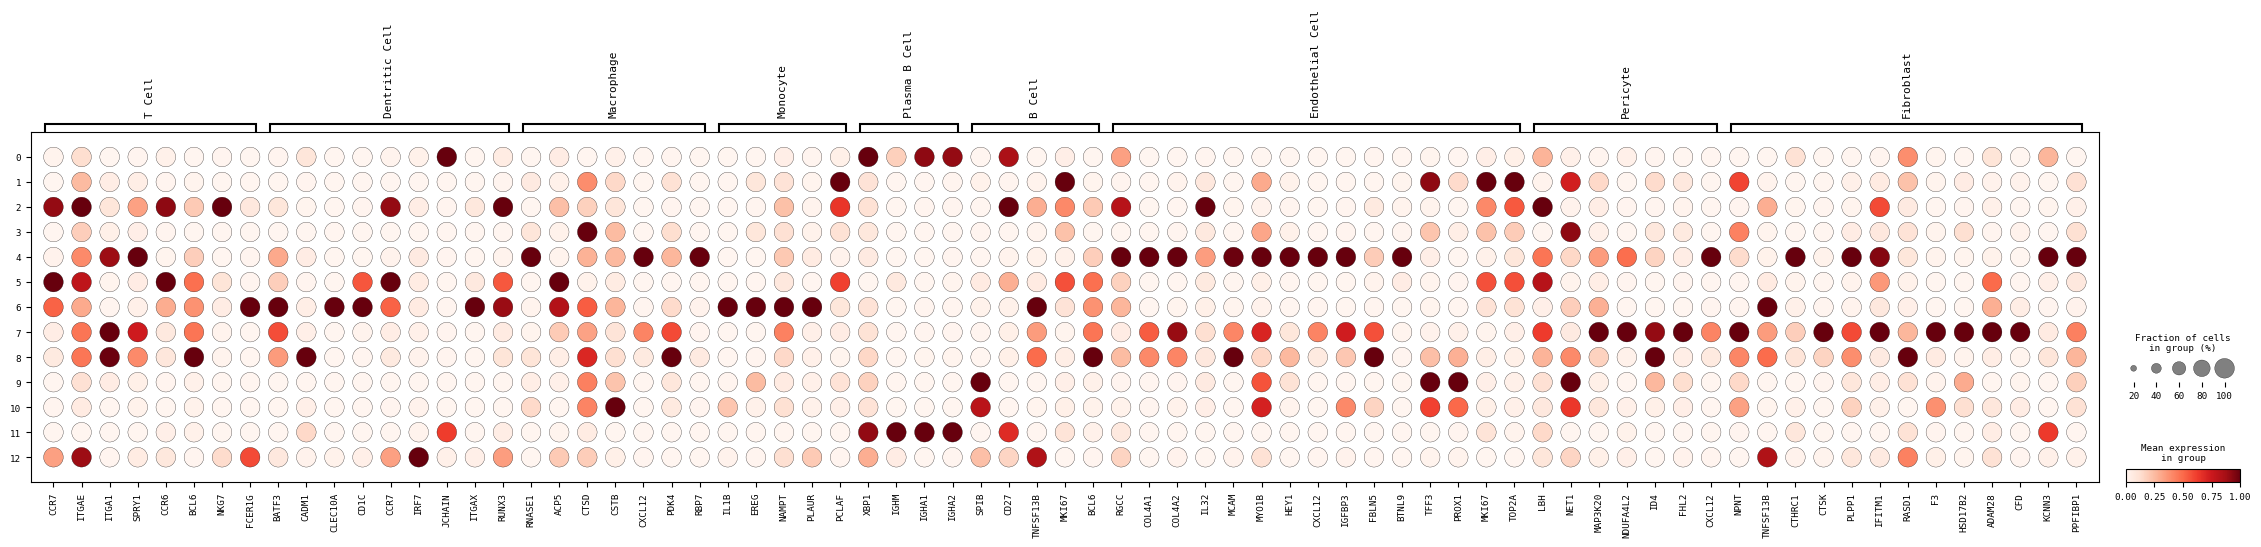

In [9]:
sc.pl.dotplot(
    adata,
    groupby="leiden_res0_6",
    var_names=other_markers,
    standard_scale="var",  # standard scale: normalize each gene to range from 0 to 1
)

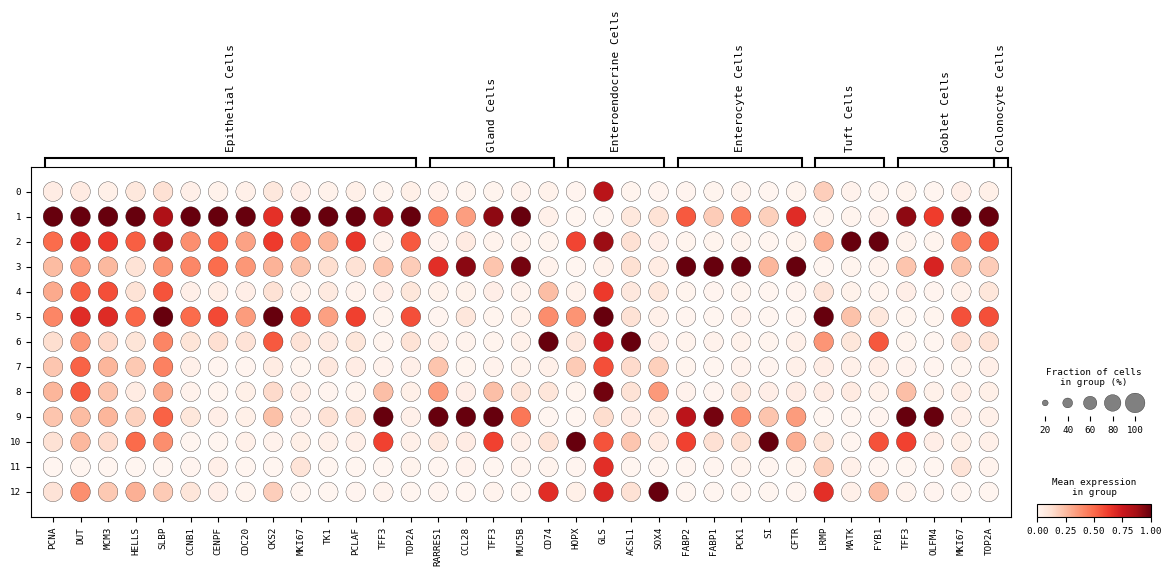

In [10]:
sc.pl.dotplot(
    adata,
    groupby="leiden_res0_6",
    var_names=endo_markers,
    standard_scale="var",  # standard scale: normalize each gene to range from 0 to 1
)

In [9]:
cl_annotation = {
    "0": "Plasma B Cell",
    "1": "Epithelial Cells / Goblet Cells",
    "2": "T Cell / Tuft Cells",
    "3": "Enterocyte Cells", 
    "4": "Endothelial Cell / Macrophage",
    "5": "T Cell", 
    "6": "Monocyte / Dentritic Cell",
    "7": "Pericyte / Fibroblast", 
    "8": "T Cell",
    "9": "Gland Cells",
    "10": "Enterocyte Cells",
    "11": "Plasma B Cell",
    "12": "Enteroendocrine Cells"
}

adata.obs["manual_celltype_annotation"] = adata.obs.leiden_res0_6.map(cl_annotation)

In [10]:
adata_celltypist = adata.copy()  # make a copy of our adata
adata_celltypist.X = adata.layers["counts"]  # set adata.X to raw counts
sc.pp.normalize_per_cell(
    adata_celltypist, counts_per_cell_after=10**4
)  # normalize to 10,000 counts per cell
sc.pp.log1p(adata_celltypist)  # log-transform
# make .X dense instead of sparse, for compatibility with celltypist:
adata_celltypist.X = adata_celltypist.X.toarray()
adata_celltypist

AnnData object with n_obs × n_vars = 7641 × 10962
    obs: 'sampleID', 'barcode', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', '_scvi_batch', '_scvi_labels', 'leiden_res0_6', 'manual_celltype_annotation', 'n_counts'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'neighbors', 'sampleID_colors', 'umap', 'hvg', 'pca', 'leiden', 'leiden_res0_6_colors', 'log1p'
    obsm: 'X_scVI', 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'int_norm', 'int_norm_log', 'tc_norm', 'tc_norm_log', 'counts'
    obsp: 'connectivities', 'distances'

In [11]:
models.download_models(
    force_update=True, model=["Cells_Intestinal_Tract.pkl"]
)

model_intestine = models.Model.load(model="Cells_Intestinal_Tract.pkl")

# model_intestine.cell_types

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json


📚 Total models in list: 44
📂 Storing models in C:\Users\saman\.celltypist\data\models
💾 Total models to download: 1
💾 Downloading model [1/1]: Cells_Intestinal_Tract.pkl


In [12]:
predictions = celltypist.annotate(
    adata_celltypist, model=model_intestine, majority_voting=True
)

predictions_adata = predictions.to_adata()

🔬 Input data has 7641 cells and 10962 genes
🔗 Matching reference genes in the model


🧬 1180 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


In [13]:
adata.obs["celltypist_cell_label"] = predictions_adata.obs.loc[
    adata.obs.index, "majority_voting"
]
adata.obs["celltypist_conf_score"] = predictions_adata.obs.loc[
    adata.obs.index, "conf_score"
]

celltypist_cell_label_coarse = {
    "T Cell": ["Activated CD4 T", "SELL+ CD4 T", "Tfh", "Treg", "gdT"], 
    "Dentritic Cell": ["cDC1", "cDC2", "Lymphoid DC"], 
    "B Cell": ["Cycling B cell", "GC B cell", "Memory B", "STAT1+ Naive B"], 
    "Stromal": ['Stromal 1 (CCL11+)', 'Stromal 2 (NYP+)', 'Stromal 2 (NPY+)'], 
    "Enteroendocrine": ['Mature arterial EC', 'Mature venous EC'],
    "Epithelial": ['BEST4+ epithelial', 'Microfold cell', 'arterial capillary', "TA"] 
}

adata.obs['celltypist_cell_label_coarse'] = adata.obs['celltypist_cell_label']

for coarse, fine in celltypist_cell_label_coarse.items():
    adata.obs['celltypist_cell_label_coarse'] = np.where([adata.obs['celltypist_cell_label'].isin(fine)], coarse, adata.obs['celltypist_cell_label_coarse'])[0]

adata.obs.head()

,sampleID,barcode,doublet_score,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,...,pct_counts_hb,outlier,mt_outlier,_scvi_batch,_scvi_labels,leiden_res0_6,manual_celltype_annotation,celltypist_cell_label,celltypist_conf_score,celltypist_cell_label_coarse
CID005217-1-AAAGGTAAGAGTCAGC,CID005217-1,AAAGGTAAGAGTCAGC,0.054189,1975,7.588830,4910.0,8.499233,25.641548,947.0,6.854354,...,0.000000,False,False,0,0,2,T Cell / Tuft Cells,Treg,0.704891,T Cell
CID005217-1-AAAGTCCTCGAACGGA,CID005217-1,AAAGTCCTCGAACGGA,0.170773,3156,8.057377,12075.0,9.398975,23.892340,2034.0,7.618251,...,0.008282,False,False,0,0,2,T Cell / Tuft Cells,Treg,0.318011,T Cell
CID005217-1-AACAGGGAGTATTGCC,CID005217-1,AACAGGGAGTATTGCC,0.011595,2239,7.714231,5180.0,8.552753,24.652510,882.0,6.783325,...,0.019305,False,False,0,0,7,Pericyte / Fibroblast,Stromal 1 (CCL11+),0.004232,Stromal
CID005217-1-AACAGGGGTGAATGAT,CID005217-1,AACAGGGGTGAATGAT,0.036990,1800,7.496097,4670.0,8.449128,25.074946,422.0,6.047372,...,0.021413,False,False,0,0,7,Pericyte / Fibroblast,Stromal 2 (NPY+),0.845731,Stromal
CID005217-1-AACCAACGTCATCGCG,CID005217-1,AACCAACGTCATCGCG,0.031200,2651,7.883069,7685.0,8.947156,17.748861,578.0,6.361302,...,0.000000,False,False,0,0,6,Monocyte / Dentritic Cell,Monocytes,0.994673,Monocytes


... storing 'manual_celltype_annotation' as categorical
... storing 'celltypist_cell_label_coarse' as categorical


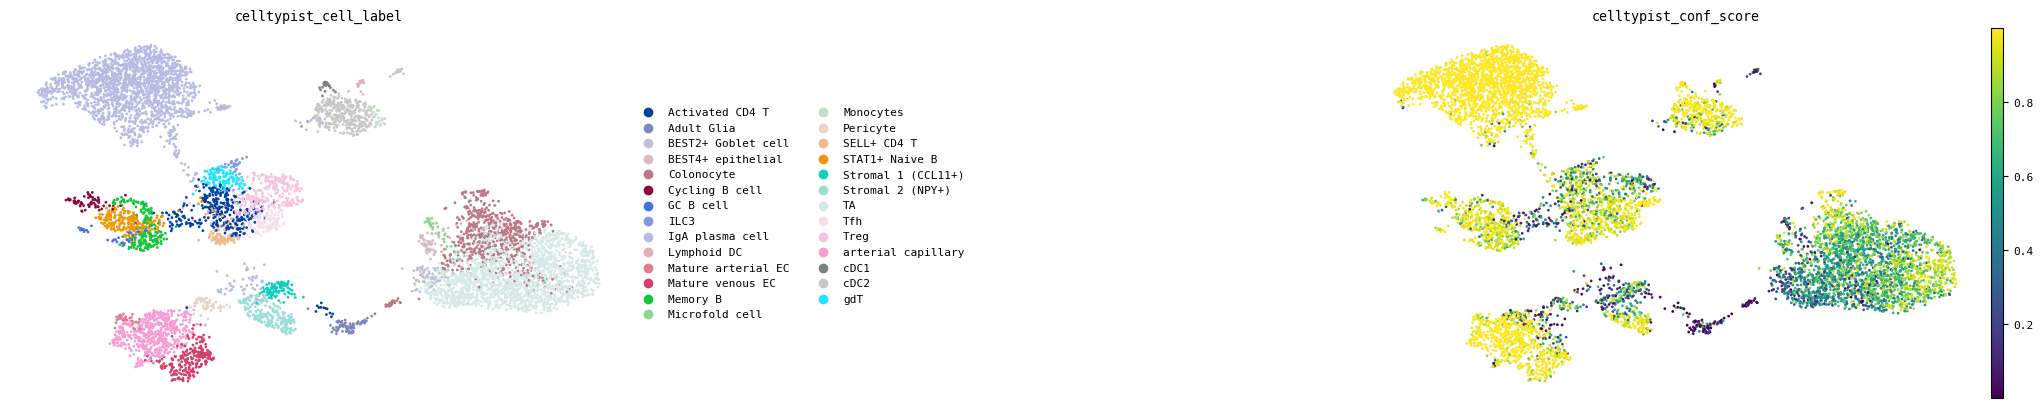

In [14]:
sc.pl.umap(
    adata,
    color=["celltypist_cell_label", "celltypist_conf_score"],
    frameon=False,
    sort_order=False,
    wspace=1,
    #legend_loc="on_data",
)

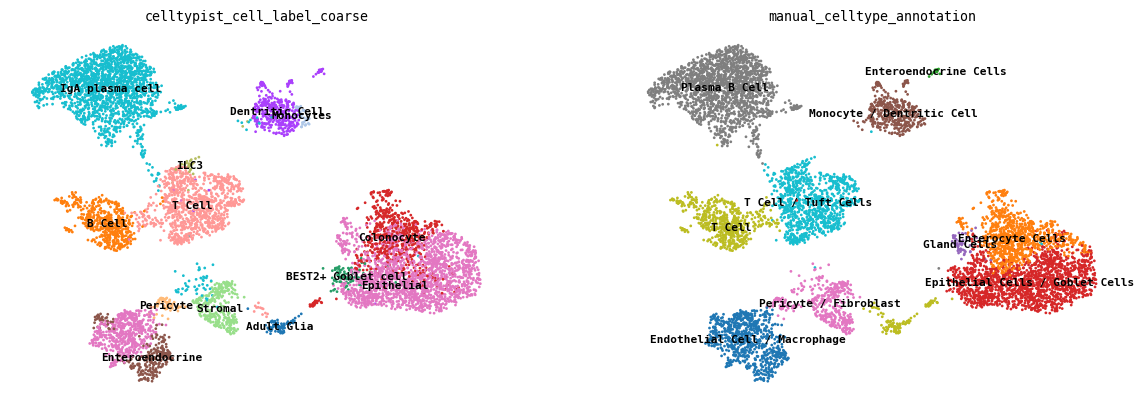

In [15]:
sc.pl.umap(
    adata,
    color=["celltypist_cell_label_coarse", "manual_celltype_annotation"],
    frameon=False,
    legend_loc = "on data",
)

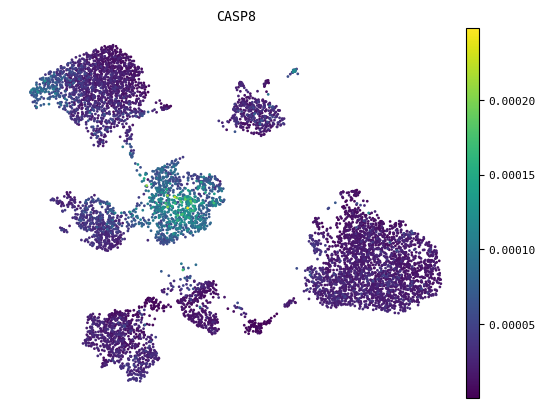

In [45]:
sc.pl.umap(
    adata,
    color=["CASP8"],
    frameon=False,
    #legend_loc = "on data",
)

## Gene Expression Viz

In [16]:
# check w and wout log transformation 
adata

AnnData object with n_obs × n_vars = 7641 × 10962
    obs: 'sampleID', 'barcode', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', '_scvi_batch', '_scvi_labels', 'leiden_res0_6', 'manual_celltype_annotation', 'celltypist_cell_label', 'celltypist_conf_score', 'celltypist_cell_label_coarse'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'neighbors', 'sampleID_colors', 'umap', 'hvg', 'pca', 'leiden', 'leiden_res0_6_colors', 'celltypist_cell_label_colors', 'celltypist_cell_label_coarse_colors', 'manual_celltype_annotation_colors'
    obsm: 'X_scVI', 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'int_norm', 'int_norm_log', 'tc_nor

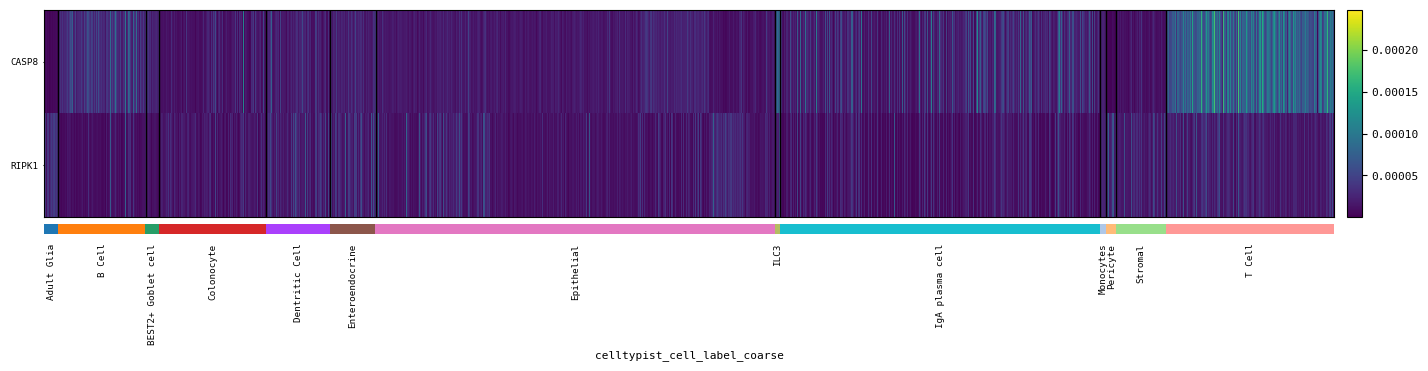

In [42]:
markers = ['CASP8', 'RIPK1']
sc.pl.heatmap(adata, markers, groupby='celltypist_cell_label_coarse', swap_axes=True, figsize=(17,3), layer='int_norm_log')

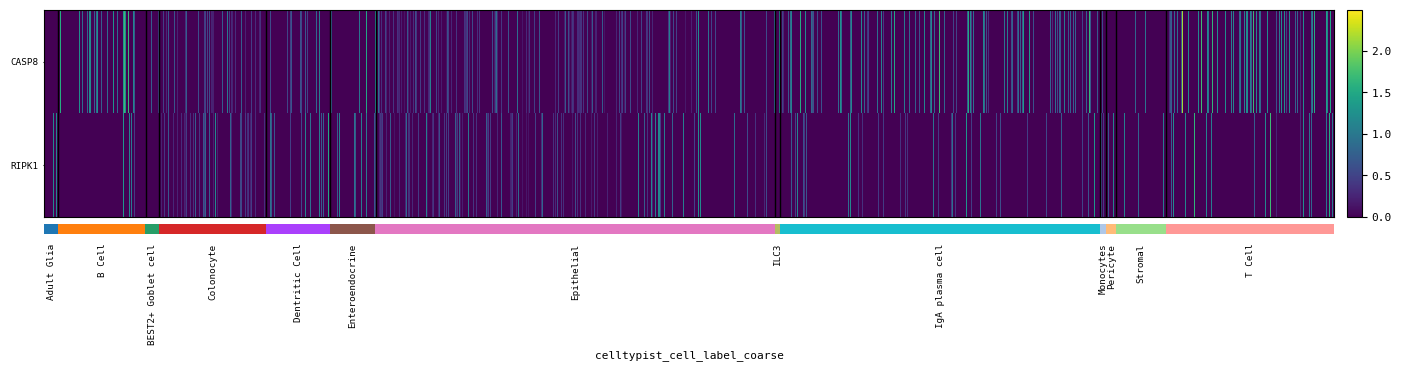

In [43]:
sc.pl.heatmap(adata, markers, groupby='celltypist_cell_label_coarse', swap_axes=True, figsize=(17,3), layer='tc_norm_log')

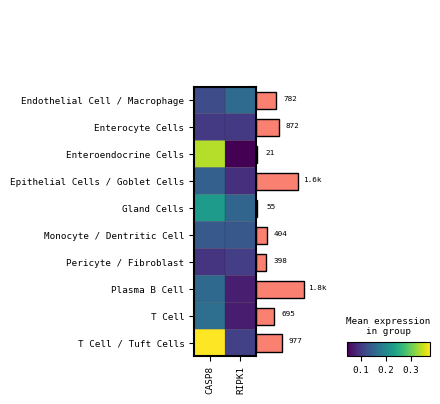

In [30]:
ax1 = sc.pl.matrixplot(adata, markers, groupby='manual_celltype_annotation', return_fig=True, layer='tc_norm')
ax1.add_totals().style(edge_color='black').show()


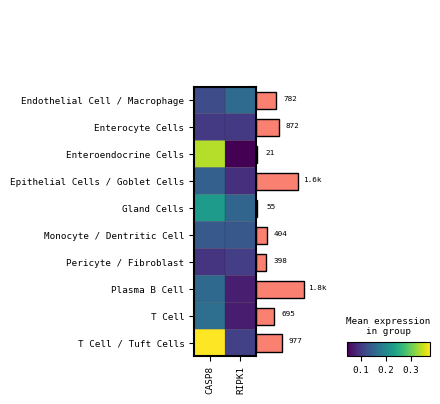

In [32]:
ax2 = sc.pl.matrixplot(adata, markers, groupby='manual_celltype_annotation', return_fig=True, layer='tc_norm_log')
ax2.add_totals().style(edge_color='black').show()


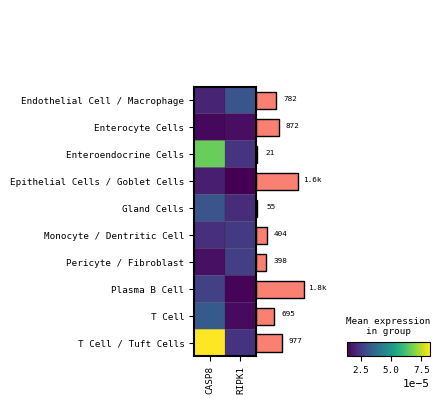

In [33]:
ax3 = sc.pl.matrixplot(adata, markers, groupby='manual_celltype_annotation', return_fig=True, layer='int_norm')
ax3.add_totals().style(edge_color='black').show()


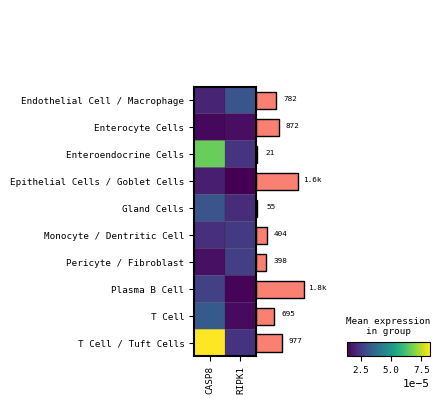

In [34]:
ax4 = sc.pl.matrixplot(adata, markers, groupby='manual_celltype_annotation', return_fig=True, layer='int_norm_log')
ax4.add_totals().style(edge_color='black').show()